In [1]:
import numpy as np 
import pandas as pd 

# from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# import pandas_profiling as pp

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("C://Users//USER//Desktop//titanic//train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("C://Users//USER//Desktop//titanic//test.csv")

In [3]:
# # by using pandas profiling, we can get all the information of the data
# # instead of EDA, we can use it
# pp.ProfileReport(train_df)

In [4]:
# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [6]:
train_df.shape

(891, 12)

In [7]:
test_df.shape

(418, 11)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# check missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# check missing values in test data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# Missing values

In [14]:
# percent of missing "Age" in train_data
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


In [15]:
# percent of missing "Cabin" in train_data
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


we can remove Cabin column data , because of missing values

77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

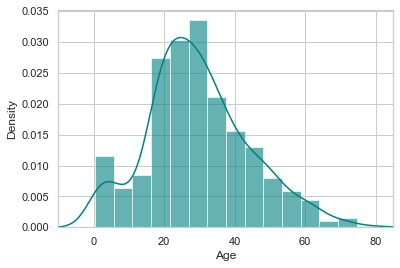

In [16]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [17]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [18]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(train_df["Age"]))

print("\nStd-dev:");
print(np.std(train_df["Age"]))

print("\nMedians:")
print(np.median(train_df["Age"].median(skipna=True)))


print("\nQuantiles:")
print(np.percentile(train_df["Age"].median(skipna=True),np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(train_df["Age"].median(skipna=True),90))

# from statsmodels import robust
# print ("\nMedian Absolute Deviation")
# print(robust.mad(train_df["Age"].median(skipna=True)))


Means:
29.69911764705882

Std-dev:
14.516321150817316

Medians:
28.0

Quantiles:
[28. 28. 28. 28.]

90th Percentiles:
28.0


In [21]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

In [22]:
print('The most common boarding port of embarkation is {}.'.format(train_df['Embarked'].value_counts().idxmax()))

The most common boarding port of embarkation is S.


In [23]:
#Final Adjustments to Data (Train & Test)

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

If "Age" is missing for a given row, I'll impute with 28 (median age). If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port). I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [24]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [25]:
print("checking missing values")
train_data.isna().sum()

checking missing values


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

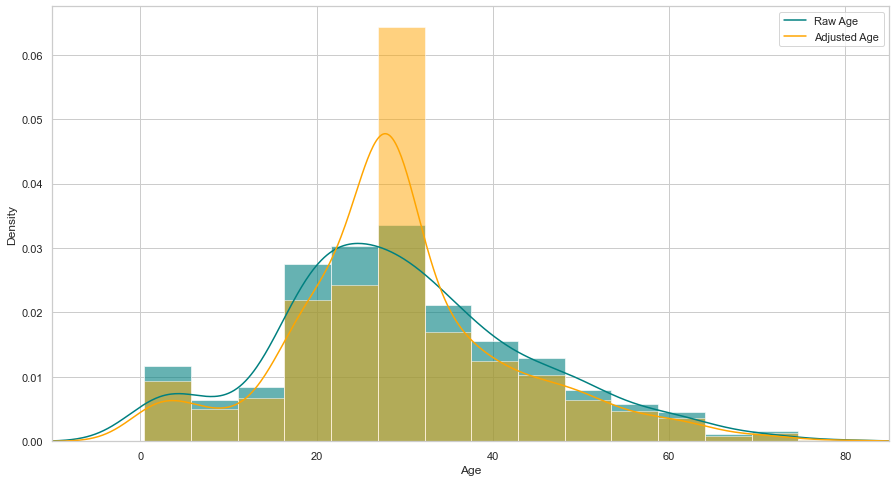

In [26]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

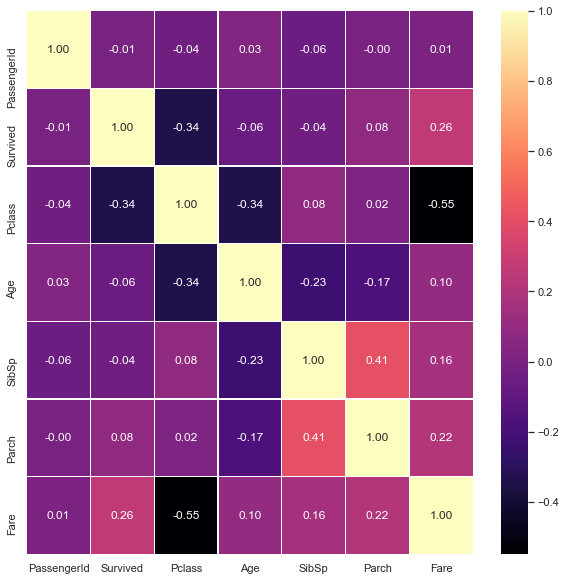

In [27]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

fom the correlation plot,
 both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [28]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [29]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

In [30]:
# drop unwanted columns
training.drop('Sex_female', axis=1, inplace=True)
training.drop('Pclass_3', axis=1, inplace=True)
training.drop('Embarked_S', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

In [62]:
final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,0,22.0,7.2500,0,0,0,0,0,1
1,1,38.0,71.2833,0,1,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,0,0
3,1,35.0,53.1000,0,1,0,0,0,0
4,0,35.0,8.0500,1,0,0,0,0,1


In [32]:
# fare

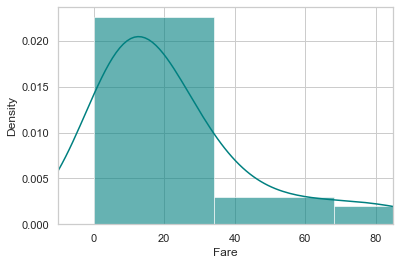

In [33]:
ax = train_df["Fare"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Fare"].plot(kind='density', color='teal')
ax.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()

In [34]:
# Do all preprocess steps for testing data

In [35]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('Pclass_3', axis=1, inplace=True)
testing.drop('Embarked_S', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,34.5,7.8292,1,0,0,0,1,1
1,47.0,7.0000,0,0,0,0,0,0
2,62.0,9.6875,1,0,1,0,1,1
3,27.0,8.6625,1,0,0,0,0,1
4,22.0,12.2875,0,0,0,0,0,0


In [61]:
final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Embarked_C,Embarked_Q,Sex_male
0,34.5,7.8292,1,0,0,0,1,1
1,47.0,7.0000,0,0,0,0,0,0
2,62.0,9.6875,1,0,1,0,1,1
3,27.0,8.6625,1,0,0,0,0,1
4,22.0,12.2875,0,0,0,0,0,0


In [36]:
print("\nQuantiles:")
print(np.percentile(training["Age"],np.arange(0, 100, 25)))
print("\n90th Percentiles:")
print(np.percentile(training["Age"].median(skipna=True),90))



Quantiles:
[ 0.42 22.   28.   35.  ]

90th Percentiles:
28.0


In [37]:
# EDA

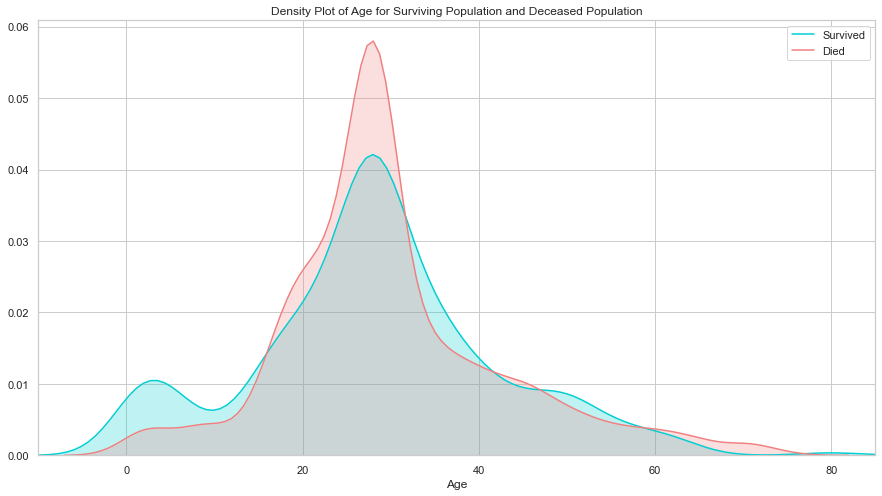

In [38]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

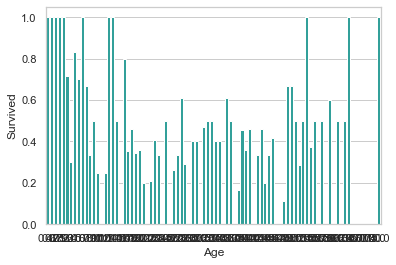

In [39]:
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"



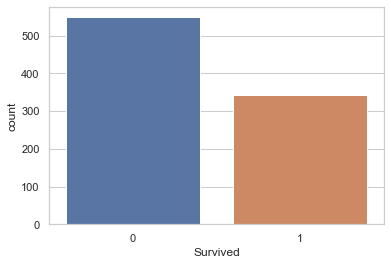

In [40]:
sns.countplot(training["Survived"],label='count')

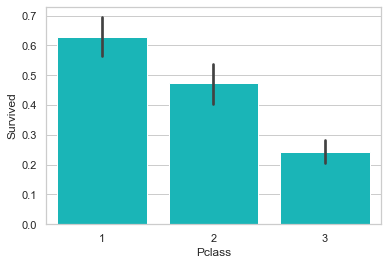

In [41]:
# Exploration of Passenger Class

sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

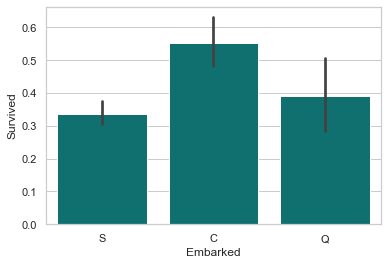

In [42]:
# Exploration of Embarked Port
sns.barplot('Embarked', 'Survived', data=train_df, color="teal")
plt.show()


Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck). It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

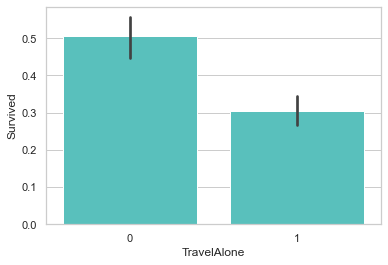

In [43]:
#Exploration of Traveling Alone vs. With Family
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

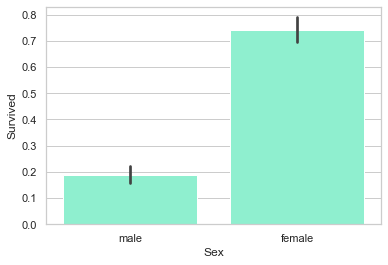

In [44]:
#  Exploration of Gender Variable
sns.barplot('Sex', 'Survived', data=train_df, color="aquamarine")
plt.show()

This is a very obvious difference. Clearly being female greatly increased your chances of survival.

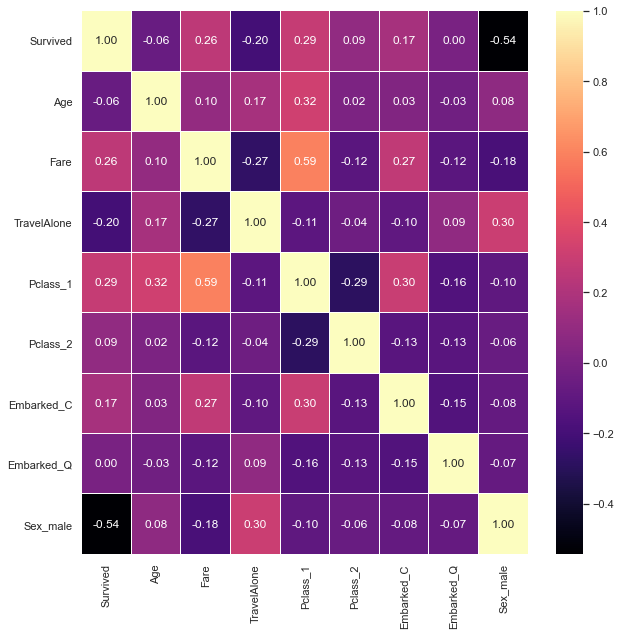

In [45]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(final_train.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [46]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Embarked_C', 'Embarked_Q', 'Sex_male'],
      dtype='object')

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
cols = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2','Embarked_C', 'Embarked_Q', 'Sex_male'] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
# model = RandomForestClassifier()
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_Q', 'Sex_male']


Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 7
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_Q', 'Sex_male']


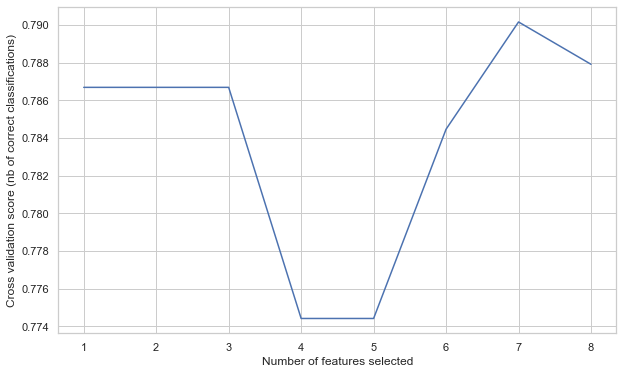

In [48]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X, y)
print('Score list:', select_feature.scores_)
print('Feature list:', X.columns)

Score list: [2.16491630e+01 4.51831909e+03 1.46407927e+01 5.51751510e+01
 6.16076687e+00 2.04644013e+01 1.08467891e-02 9.27024470e+01]
Feature list: Index(['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_Q', 'Sex_male'],
      dtype='object')


In [50]:
def plot_feature_importances(importances, features):
    # get the importance rating of each feature and sort it
    indices = np.argsort(importances)

    # make a plot with the feature importance
    plt.figure(figsize=(12,14), dpi= 80, facecolor='w', edgecolor='k')
    plt.grid()
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], height=0.8, color='mediumvioletred', align='center')
    plt.axvline(x=0.03)
    plt.yticks(range(len(indices)), list(X))
    plt.xlabel('Relative Importance')
    plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=123)
classifier.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

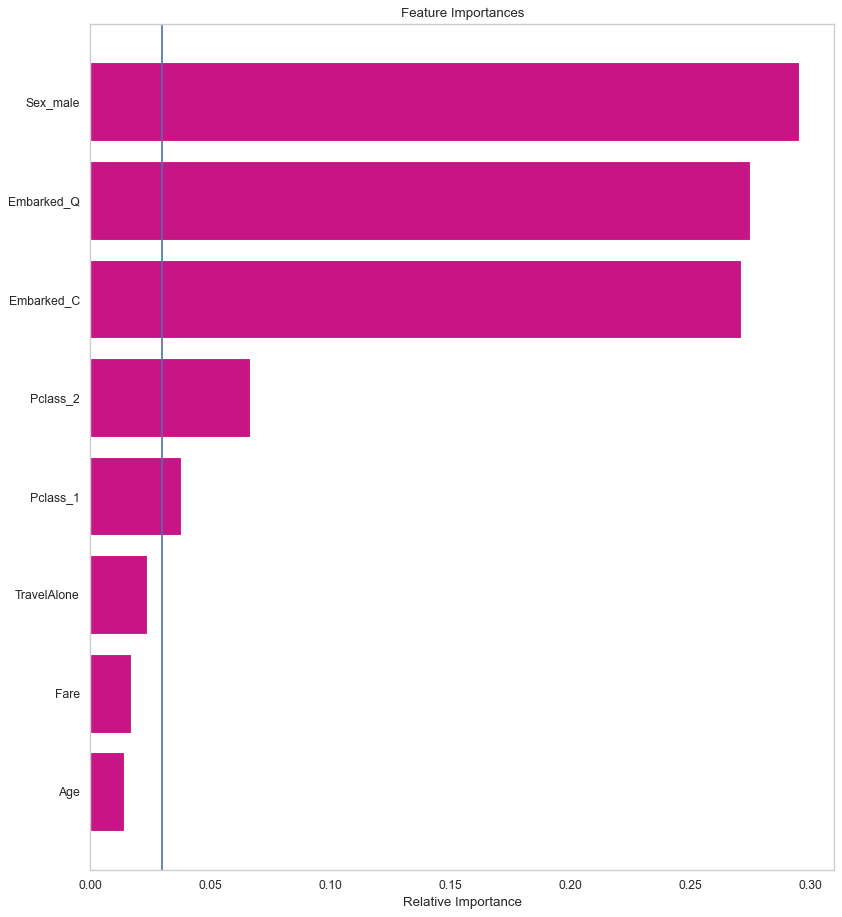

In [52]:
plot_feature_importances(classifier.feature_importances_, X)

In [53]:
# model_training

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [55]:
#********************************************************************
#*********************** LOGISTIC REGRESSION****************************************
#Logistic regression
#Create estimator class
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
print("UsingGrid_Search for, Logistic Regression Algorithm")
model = LogisticRegression()

#Create param grid
params = {'C': [0.001,0.005,0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1','l2'],'random_state':[125]}

#Making models with hyper parameters sets
model4 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model4.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model4.best_params_)
#Prediction
y_pred_1=model4.predict(X_test)
y_pred_2=model4.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

UsingGrid_Search for, Logistic Regression Algorithm
Best Hyper Parameters:
 {'C': 0.5, 'penalty': 'l2', 'random_state': 125}
****** report on test data********************************
0.776536312849162
[[88 28]
 [12 51]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       116
           1       0.65      0.81      0.72        63

    accuracy                           0.78       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.80      0.78      0.78       179

****** report on train  data********************************
0.8103932584269663
[[393  79]
 [ 56 184]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       472
           1       0.70      0.77      0.73       240

    accuracy                           0.81       712
   macro avg       0.79      0.80      0.79       712
weighted avg       0.82      0.81      0.81       712



In [56]:
#********************************************************************
#*********************** GENERAL LOGISTIC REGRESSION****************************************
print("Using General Logistic Regression Algorithm")
from sklearn.linear_model import LogisticRegression
lg_reg=LogisticRegression(random_state=12)
lg_reg.fit(X_train,y_train)
#Prediction
y_pred_1=lg_reg.predict(X_test)
y_pred_2=lg_reg.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

Using General Logistic Regression Algorithm
****** report on test data********************************
0.7821229050279329
[[88 27]
 [12 52]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       115
           1       0.66      0.81      0.73        64

    accuracy                           0.78       179
   macro avg       0.77      0.79      0.77       179
weighted avg       0.80      0.78      0.79       179

****** report on train  data********************************
0.8103932584269663
[[392  78]
 [ 57 185]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       470
           1       0.70      0.76      0.73       242

    accuracy                           0.81       712
   macro avg       0.79      0.80      0.79       712
weighted avg       0.82      0.81      0.81       712



In [57]:
#********************************************************************************
#***************************RANDOM FOREST **********************************
#Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#making the instance
print("Using Grid_Search,For Random Gorest_Algorithm")
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'max_features': ['auto', 'sqrt', 'log2'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'bootstrap': [True,False],
          'random_state':[126],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model2 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model2.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model2.best_params_)
#Prediction
y_pred_1=model2.predict(X_test)
y_pred_2=model2.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


Using Grid_Search,For Random Gorest_Algorithm
Best Hyper Parameters:
 {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 15, 'n_jobs': -1, 'random_state': 126}
****** report on test data********************************
0.770949720670391
[[90 31]
 [10 48]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       121
           1       0.61      0.83      0.70        58

    accuracy                           0.77       179
   macro avg       0.75      0.79      0.76       179
weighted avg       0.81      0.77      0.78       179

****** report on train  data********************************
0.8890449438202247
[[427  57]
 [ 22 206]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       484
           1       0.78      0.90      0.84       228

    accuracy                           0.89       712
   macro avg    

In [70]:
y_pred_test=model2.predict(final_test)

In [71]:
PassengerId = test_data['PassengerId']
logSub = pd.DataFrame({'PassengerId': PassengerId, 'Survived':y_pred_test})
logSub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [72]:
logSub.to_csv("C://Users//USER//Desktop//Logistics_Regression_Submission.csv", index = False)

In [58]:
#********************************************************************
#***********************GENERAL RANDOM FOREST**********************
print("Using General_Random_Forest_Algorithm")
from sklearn.ensemble import RandomForestClassifier
clf4=RandomForestClassifier(random_state=124)
clf4.fit(X_train,y_train)
y_pred_1=clf4.predict(X_test)
y_pred_2=clf4.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

Using General_Random_Forest_Algorithm
****** report on test data********************************
0.7541899441340782
[[84 28]
 [16 51]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       112
           1       0.65      0.76      0.70        67

    accuracy                           0.75       179
   macro avg       0.74      0.76      0.75       179
weighted avg       0.77      0.75      0.76       179

****** report on train  data********************************
0.9676966292134831
[[443  17]
 [  6 246]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       460
           1       0.94      0.98      0.96       252

    accuracy                           0.97       712
   macro avg       0.96      0.97      0.97       712
weighted avg       0.97      0.97      0.97       712



In [71]:
#*************************************DesicionTree******************************888
#importing modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
print("using Grid_search_Decision_Tree Algorithm")
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'criterion':['gini','entropy'],
          'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
y_pred_1=model1.predict(X_test)
y_pred_2=model1.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


using Grid_search_Decision_Tree Algorithm
Best Hyper Parameters: {'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'random_state': 123}
****** report on test data********************************
0.7150837988826816
[[82 33]
 [18 46]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       115
           1       0.58      0.72      0.64        64

    accuracy                           0.72       179
   macro avg       0.70      0.72      0.70       179
weighted avg       0.74      0.72      0.72       179

****** report on train  data********************************
0.9213483146067416
[[433  40]
 [ 16 223]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       473
           1       0.85      0.93      0.89       239

    accuracy                           0.92       712
   macro avg       0.91      0.92      0.91       712
weighted avg       0.9

C:\Users\USER\anaconda3\envs\detection\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:

#*******************************************************8
#***********************GENERAL DECISION TREE **************
print("General_Decision_Tree Algorithm")
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=123)
clf.fit(X_train,y_train)
y_pred_1=clf.predict(X_test)
y_pred_2=clf.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

General_Decision_Tree Algorithm
****** report on test data********************************
0.7597765363128491
[[82 25]
 [18 54]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       107
           1       0.68      0.75      0.72        72

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.76      0.76       179

****** report on train  data********************************
0.9859550561797753
[[448   9]
 [  1 254]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       457
           1       0.97      1.00      0.98       255

    accuracy                           0.99       712
   macro avg       0.98      0.99      0.98       712
weighted avg       0.99      0.99      0.99       712



In [ ]:
# #********************************************************************
# #***********************SVM****************************************
# #SVM
# #importing modules
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# #making the instance
# print("Using Grid Search_For SVC_Algorithm")
# model=SVC()
# #Hyper Parameters Set
# params = {'C': [6,7,8,9,10,11,12], 
#           'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
#           'kernel': ['linear','rbf'],
#          'random_state':[143]}
# #Making models with hyper parameters sets
# model3 = GridSearchCV(model, param_grid=params, n_jobs=-1)
# #Learning
# model3.fit(X_train,y_train)
# #The best hyper parameters set
# print("Best Hyper Parameters:\n",model3.best_params_)
# #Prediction
# y_pred_1=model3.predict(X_test)
# y_pred_2=model3.predict(X_train)

# print("****** report on test data********************************")
# print(accuracy_score(y_pred_1,y_test))
# print(confusion_matrix(y_pred_1,y_test))
# print(classification_report(y_pred_1,y_test))
# print("****** report on train  data********************************")
# print(accuracy_score(y_pred_2,y_train))
# print(confusion_matrix(y_pred_2,y_train))
# print(classification_report(y_pred_2,y_train))

Using Grid Search_For SVC_Algorithm


In [ ]:
# #********************************************************************
# #*********************** GENERAL SVM****************************************
# print("Using General_SVC_Algorithm")
# from sklearn.svm import SVC
# clf1=SVC(random_state=1)
# clf1.fit(X_train,y_train)
# #Prediction
# y_pred_1=clf1.predict(X_test)
# y_pred_2=clf1.predict(X_train)

# print("****** report on test data********************************")
# print(accuracy_score(y_pred_1,y_test))
# print(confusion_matrix(y_pred_1,y_test))
# print(classification_report(y_pred_1,y_test))
# print("****** report on train  data********************************")
# print(accuracy_score(y_pred_2,y_train))
# print(confusion_matrix(y_pred_2,y_train))
# print(classification_report(y_pred_2,y_train))

In [ ]:
######################################################

In [63]:
final_train.shape

(891, 9)

In [73]:
from sklearn.utils import shuffle
final_train = shuffle(final_train)

In [74]:
final_test_train = final_train[:710]
final_test_test = final_train[710:]

In [75]:
final_test_train.shape

(710, 9)

In [77]:
final_test_train.Survived.value_counts()

0    442
1    268
Name: Survived, dtype: int64

In [78]:
final_test_test.Survived.value_counts()

0    107
1     74
Name: Survived, dtype: int64

In [79]:
#upsampling
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = final_test_train[final_test_train.Survived==0]
df_minority = final_test_train[final_test_train.Survived==1]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=442,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

y_train_new=df_upsampled['Survived']
X_train_new=df_upsampled.drop(columns="Survived")

In [88]:
y_test_new=final_test_test['Survived']
X_test_new=final_test_test.drop(columns="Survived")

In [89]:
# some other preprocessing

In [90]:
#********************************************************************
#*********************** LOGISTIC REGRESSION****************************************
#Logistic regression
#Create estimator class
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
print("UsingGrid_Search for, Logistic Regression Algorithm")
model = LogisticRegression()

#Create param grid
params = {'C': [0.001,0.005,0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1','l2'],'random_state':[125]}

#Making models with hyper parameters sets
model4 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model4.fit(X_train_new,y_train_new)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model4.best_params_)
#Prediction
y_pred_1=model4.predict(X_test_new)
y_pred_2=model4.predict(X_train_new)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test_new))
print(confusion_matrix(y_pred_1,y_test_new))
print(classification_report(y_pred_1,y_test_new))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train_new))
print(confusion_matrix(y_pred_2,y_train_new))
print(classification_report(y_pred_2,y_train_new))

UsingGrid_Search for, Logistic Regression Algorithm
Best Hyper Parameters:
 {'C': 0.5, 'penalty': 'l2', 'random_state': 125}
****** report on test data********************************
0.7734806629834254
[[88 22]
 [19 52]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       110
           1       0.70      0.73      0.72        71

    accuracy                           0.77       181
   macro avg       0.76      0.77      0.76       181
weighted avg       0.78      0.77      0.77       181

****** report on train  data********************************
0.7861990950226244
[[353 100]
 [ 89 342]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       453
           1       0.77      0.79      0.78       431

    accuracy                           0.79       884
   macro avg       0.79      0.79      0.79       884
weighted avg       0.79      0.79      0.79       884



C:\Users\USER\anaconda3\envs\detection\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [91]:
#********************************************************************
#*********************** GENERAL LOGISTIC REGRESSION****************************************
print("Using General Logistic Regression Algorithm")
from sklearn.linear_model import LogisticRegression
lg_reg=LogisticRegression(random_state=12)
lg_reg.fit(X_train_new,y_train_new)
#Prediction
y_pred_1=lg_reg.predict(X_test_new)
y_pred_2=lg_reg.predict(X_train_new)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test_new))
print(confusion_matrix(y_pred_1,y_test_new))
print(classification_report(y_pred_1,y_test_new))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train_new))
print(confusion_matrix(y_pred_2,y_train_new))
print(classification_report(y_pred_2,y_train_new))

Using General Logistic Regression Algorithm
****** report on test data********************************
0.7513812154696132
[[85 23]
 [22 51]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       108
           1       0.69      0.70      0.69        73

    accuracy                           0.75       181
   macro avg       0.74      0.74      0.74       181
weighted avg       0.75      0.75      0.75       181

****** report on train  data********************************
0.7963800904977375
[[348  86]
 [ 94 356]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       434
           1       0.81      0.79      0.80       450

    accuracy                           0.80       884
   macro avg       0.80      0.80      0.80       884
weighted avg       0.80      0.80      0.80       884



In [92]:
#********************************************************************************
#***************************RANDOM FOREST **********************************
#Randomforest
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#making the instance
print("Using Grid_Search,For Random Gorest_Algorithm")
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'max_features': ['auto', 'sqrt', 'log2'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'bootstrap': [True,False],
          'random_state':[126],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model2 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model2.fit(X_train_new,y_train_new)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model2.best_params_)
#Prediction
y_pred_1=model2.predict(X_test_new)
y_pred_2=model2.predict(X_train_new)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test_new))
print(confusion_matrix(y_pred_1,y_test_new))
print(classification_report(y_pred_1,y_test_new))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train_new))
print(confusion_matrix(y_pred_2,y_train_new))
print(classification_report(y_pred_2,y_train_new))


Using Grid_Search,For Random Gorest_Algorithm
Best Hyper Parameters:
 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 15, 'n_jobs': -1, 'random_state': 126}
****** report on test data********************************
0.850828729281768
[[96 16]
 [11 58]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       112
           1       0.78      0.84      0.81        69

    accuracy                           0.85       181
   macro avg       0.84      0.85      0.84       181
weighted avg       0.85      0.85      0.85       181

****** report on train  data********************************
0.9683257918552036
[[429  15]
 [ 13 427]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       444
           1       0.97      0.97      0.97       440

    accuracy                           0.97       884
   macro avg      

In [93]:
#********************************************************************
#***********************GENERAL RANDOM FOREST**********************
print("Using General_Random_Forest_Algorithm")
from sklearn.ensemble import RandomForestClassifier
clf4=RandomForestClassifier(random_state=124)
clf4.fit(X_train_new,y_train_new)
y_pred_1=clf4.predict(X_test_new)
y_pred_2=clf4.predict(X_train_new)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test_new))
print(confusion_matrix(y_pred_1,y_test_new))
print(classification_report(y_pred_1,y_test_new))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train_new))
print(confusion_matrix(y_pred_2,y_train_new))
print(classification_report(y_pred_2,y_train_new))

Using General_Random_Forest_Algorithm
****** report on test data********************************
0.7679558011049724
[[91 26]
 [16 48]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       117
           1       0.65      0.75      0.70        64

    accuracy                           0.77       181
   macro avg       0.75      0.76      0.75       181
weighted avg       0.78      0.77      0.77       181

****** report on train  data********************************
0.9785067873303167
[[431   8]
 [ 11 434]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       439
           1       0.98      0.98      0.98       445

    accuracy                           0.98       884
   macro avg       0.98      0.98      0.98       884
weighted avg       0.98      0.98      0.98       884



In [94]:
y_pred_test1=clf4.predict(final_test)
PassengerId = test_data['PassengerId']
logSub1 = pd.DataFrame({'PassengerId': PassengerId, 'Survived':y_pred_test1})
logSub1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [95]:
logSub1.to_csv("C://Users//USER//Desktop//RF_IMbalanced_Submission.csv", index = False)